### Pipeline de ejercicio de segmentacion:
1. Mecanismo de ingesta y limpieza de dagtos
2. Seleccion de datos de test y train
3. EDA y analisis basico de las variables
4. Feature engineering
    - Aproach 1: CountVectorizer
    - Aproach 2: TF Transformation
    - Aproach 3: Word2Vec Transformation
    - Aproach 4: BERT Transformation
5. Clustering Models
6. Testing_Layer
    - Siluette
    - Diferences between predictions
    - Semantic Similarity from gpt
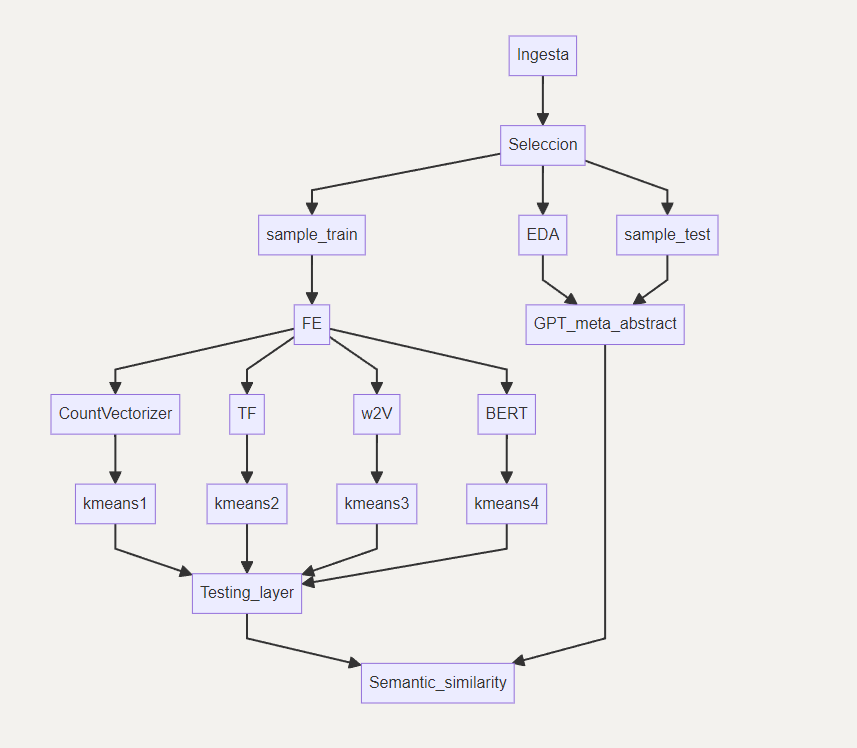

#### 1.1 Ingesta de datos

In [ ]:
## IMPORTS y CONSTANTES
import sys
sys.path.append('C:\\Users\\user\\Desktop\\Globant\\nfs-npl-globant-test-2024\\src\\data')
sys.path.append('C:\\Users\\user\\Desktop\\Globant\\nfs-npl-globant-test-2024\\src\\features')

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import torch

from importer import Importer
from wordcloud import WordCloud
from transformers import BertTokenizer, BertModel

# Constantes
path = 'C:/Users/user/Desktop/Globant/nfs-npl-globant-test-2024/data/raw/'

c:\Users\user\Desktop\Globant\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Nombres de los archivos
imp = Importer()
archivos_full = imp.abstract_names_function(path)
print(len(archivos_full))

13300


In [3]:
# Muestreo de la data
muestra = imp.abstract_sampler(archivos_full)

print("archivos: ", len(muestra))
print("array_view: ",muestra[:10])

archivos:  10640
array_view:  ['2050635.xml', '2048977.xml', '2007911.xml', '2035530.xml', '2005444.xml', '2005975.xml', '2015647.xml', '2010708.xml', '2043706.xml', '2033046.xml']


In [4]:
# Muestra para test
set_orig = set(archivos_full)
set_sample = set(muestra)

set_test_sample = set_orig-set_sample
test_sample = list(set_test_sample)

print("archivos: ", len(test_sample))

archivos:  2660


In [5]:
# Guardar data Original
with open('./nfs-npl-globant-test-2024/Data-names/train_names.json', 'w') as f:
    json.dump(muestra, f)

with open('./nfs-npl-globant-test-2024/Data-names/test_names.json', 'w') as f:
    json.dump(test_sample, f)

# with open('lista.json', 'r') as f:
#     lista = json.load(f)

#### 1.2 Limpieza de datos

In [6]:
# Extraer data y titulos
df_abstracts = pd.DataFrame([imp.extract_data(path+file) for file in muestra])
display(df_abstracts.head())

,title,abstract
0,Focusing on Professional Engagement to Increas...,This project aims to serve the national intere...
1,Collaborative Research: Dignity and the Moveme...,Collaborative Research: Dignity and the Moveme...
2,CIF: Small: Resource-Efficient Statistical Inf...,Recent years have witnessed tremendous growth ...
3,RAPID/Collaborative Research: Digitizing Early...,Dinosaur tracks and trackways provide invaluab...
4,Topics in Kinematics and Geometrical Optics: T...,The proposed research consists of two parts: m...


In [20]:
df_abstracts['clean_abstract'] = df_abstracts['abstract'].apply(imp.clean_text)
display(df_abstracts.head())

,title,abstract,clean_abstract
0,Focusing on Professional Engagement to Increas...,This project aims to serve the national intere...,this project aims to serve the national intere...
1,Collaborative Research: Dignity and the Moveme...,Collaborative Research: Dignity and the Moveme...,collaborative research dignity and the movemen...
2,CIF: Small: Resource-Efficient Statistical Inf...,Recent years have witnessed tremendous growth ...,recent years have witnessed tremendous growth ...
3,RAPID/Collaborative Research: Digitizing Early...,Dinosaur tracks and trackways provide invaluab...,dinosaur tracks and trackways provide invaluab...
4,Topics in Kinematics and Geometrical Optics: T...,The proposed research consists of two parts: m...,the proposed research consists of two parts mo...


In [21]:
# df_abstracts.to_csv('./nfs-npl-globant-test-2024/Data-names/train_data.csv', index=False)